# k-means Clustering Football Speed and Acceleration in Tackle Events

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def loadFootballPos(weekNum):
    df = pd.read_csv(f'../data/tracking_week_{weekNum}_filtered.csv')
    return df[df['displayName'] == 'football'][['s', 'a']]

df_w1_football_pos = loadFootballPos(1)
df_w2_football_pos = loadFootballPos(2)
df_w3_football_pos = loadFootballPos(3)
df_w4_football_pos = loadFootballPos(4)
df_w5_football_pos = loadFootballPos(5)
df_w6_football_pos = loadFootballPos(6)
df_w7_football_pos = loadFootballPos(7)
df_w8_football_pos = loadFootballPos(8)
df_w9_football_pos = loadFootballPos(9)

df_w1_football_pos.head()

,s,a
22,0.07,0.27
45,5.30,4.13
68,5.34,6.85
91,4.01,2.42
114,0.04,0.17


## k-means Clustering

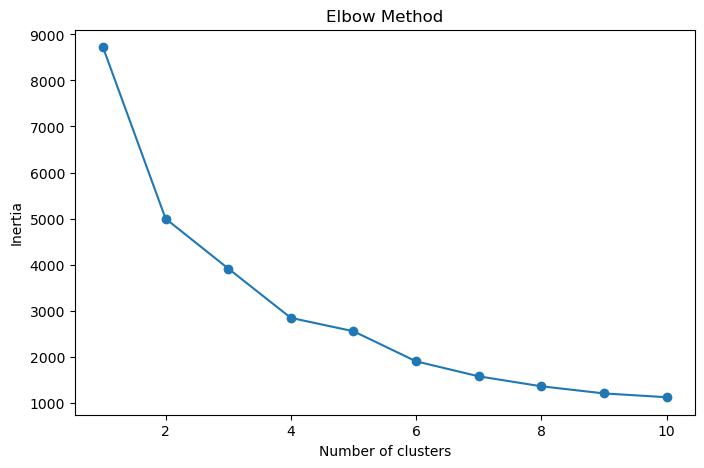

In [3]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Determine optimal number of clusters (K) using the Elbow Method
def elbowMethod(df):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)

    # Plot the elbow method to decide on the best 'K'
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
elbowMethod(df_w1_football_pos)

In [4]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Apply K-means with K=5
def kMeans(df):
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(df)

    # Add the cluster identifiers as a new attribute in the original data
    df['Cluster'] = kmeans.labels_

    return kmeans

In [5]:
# https://www.statology.org/performing-cluster-analysis-in-python-a-step-by-step-tutorial/

# Visualize the clusters
def visualize(df, weekNum):
    kmeans = kMeans(df)
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df['a'], y=df['s'], hue=df['Cluster'], palette='viridis', s=100)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
    plt.title(f'Football position at the time of tackle (week {weekNum})')
    plt.legend()
    plt.show()

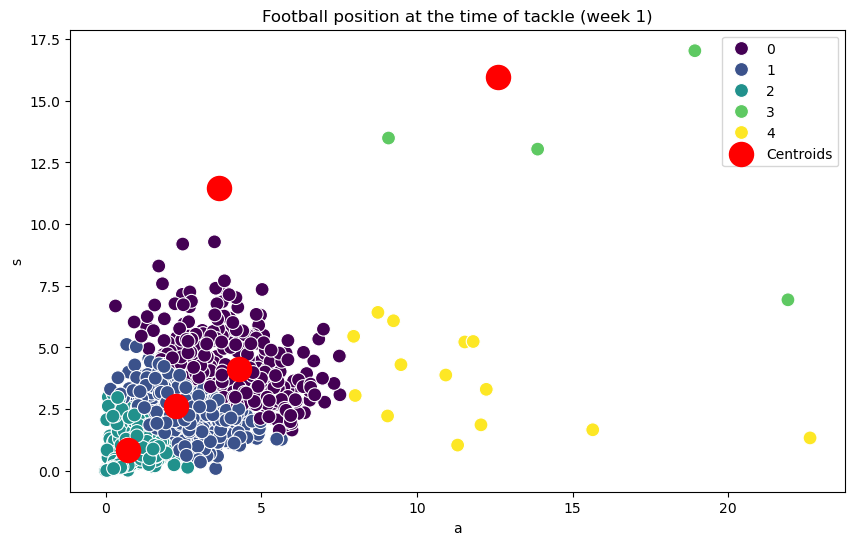

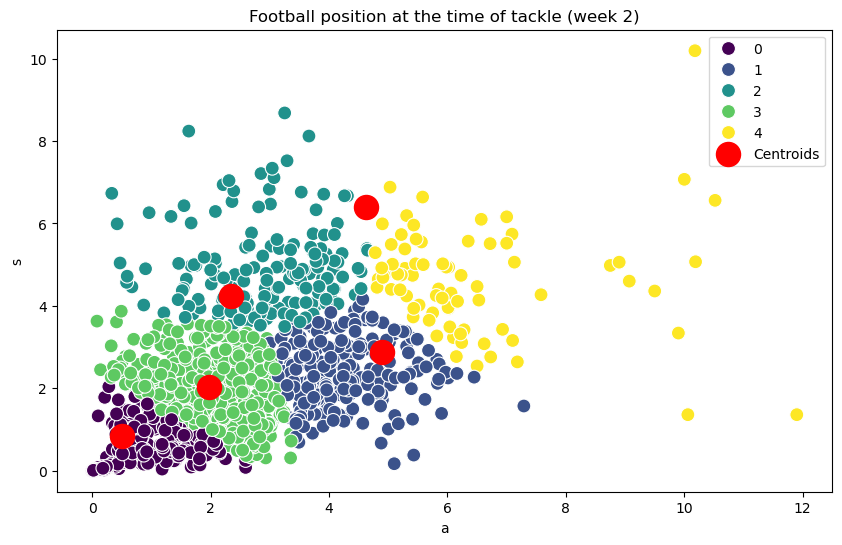

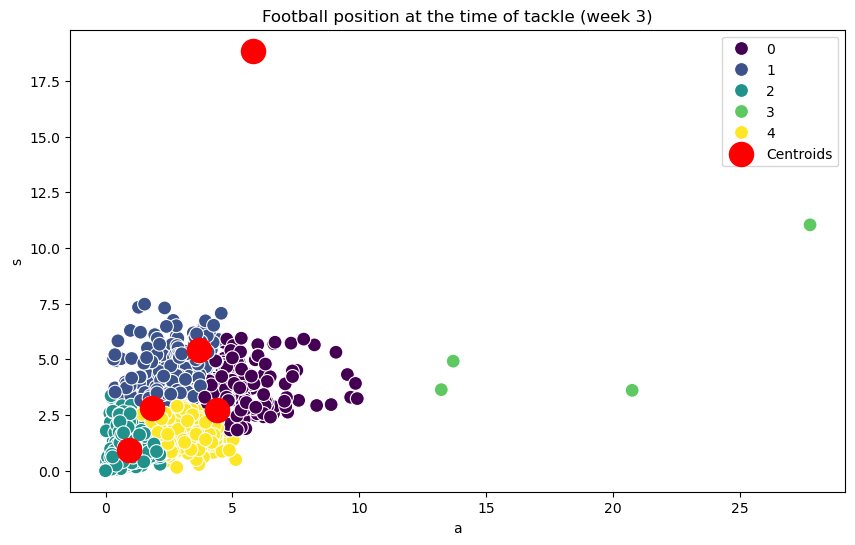

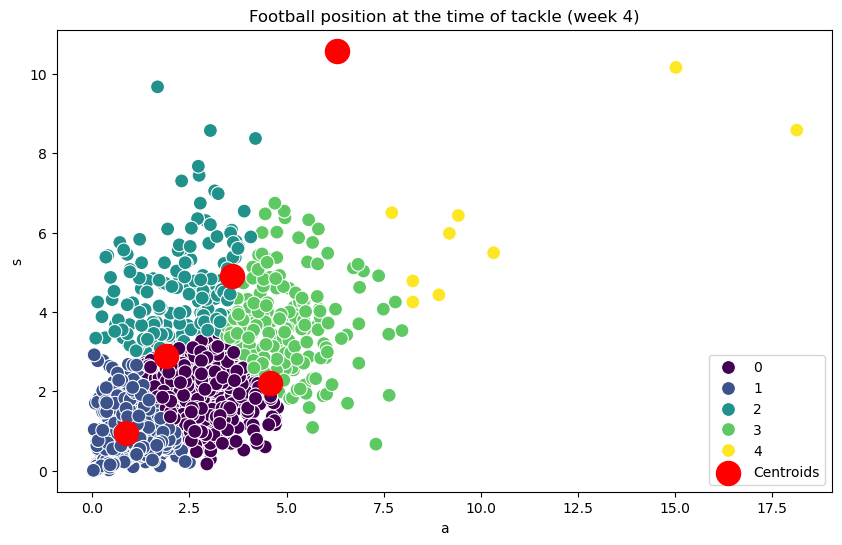

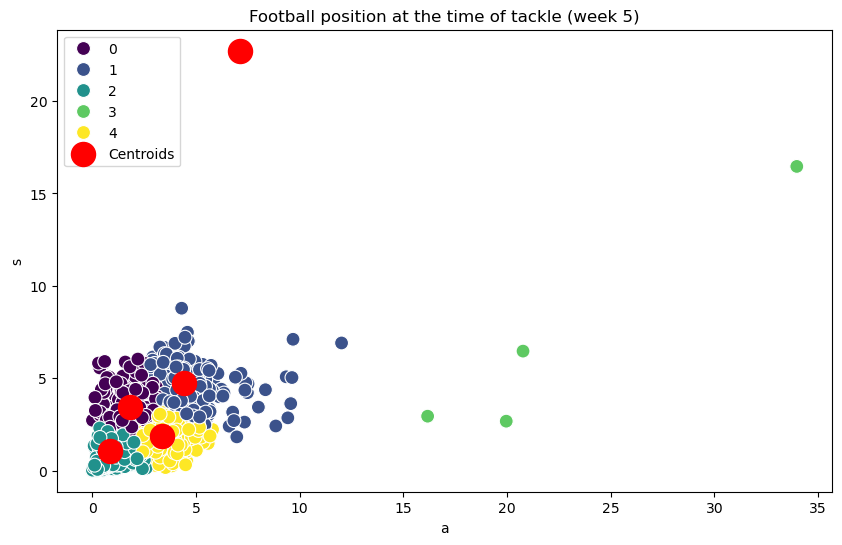

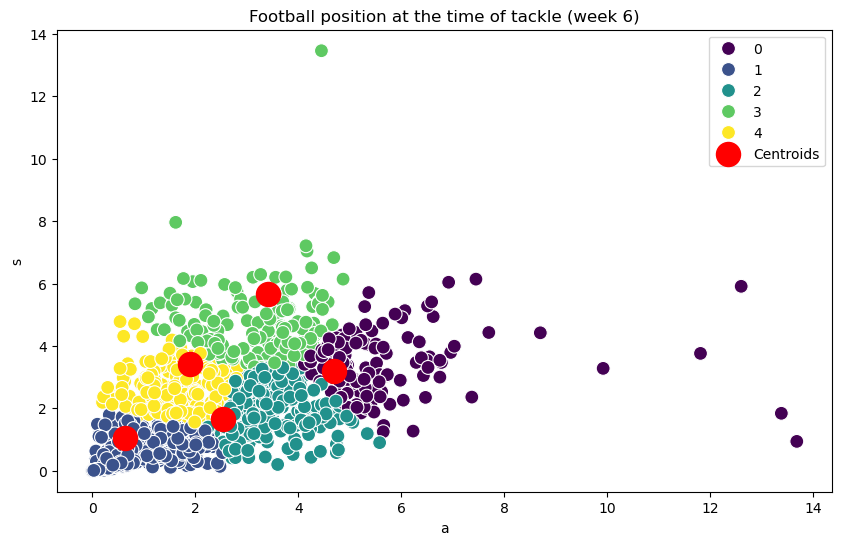

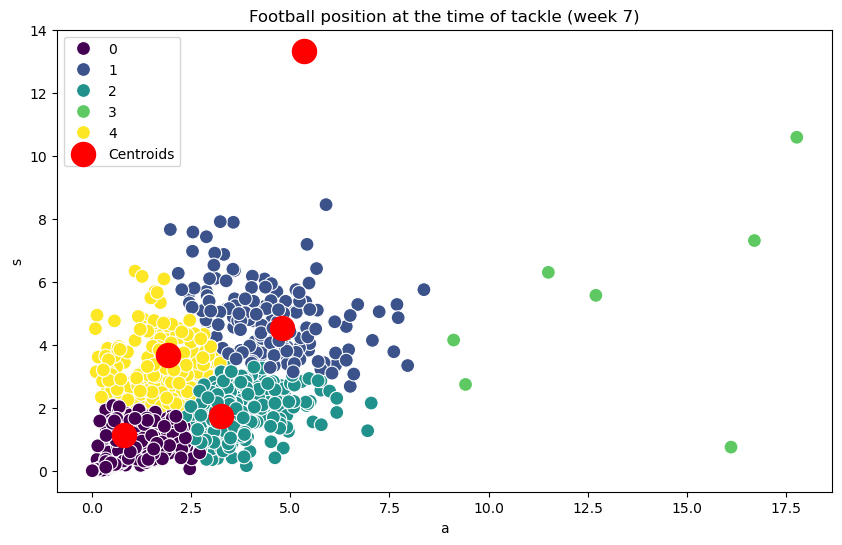

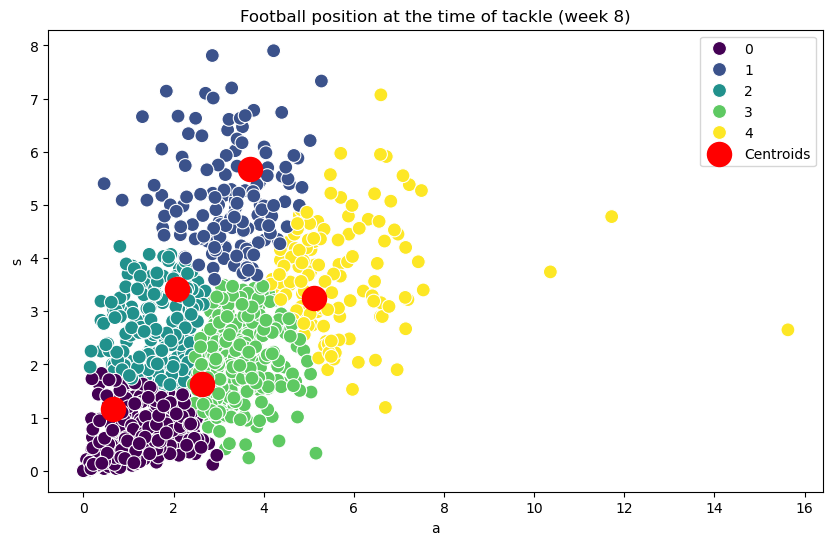

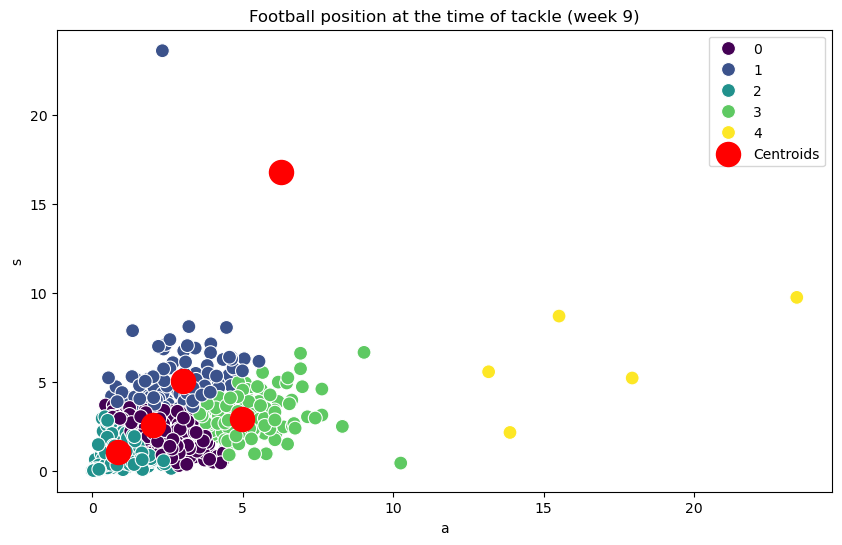

In [6]:
# Performs the same computation for weeks 2 - 9.
visualize(df_w1_football_pos, 1)
visualize(df_w2_football_pos, 2)
visualize(df_w3_football_pos, 3)
visualize(df_w4_football_pos, 4)
visualize(df_w5_football_pos, 5)
visualize(df_w6_football_pos, 6)
visualize(df_w7_football_pos, 7)
visualize(df_w8_football_pos, 8)
visualize(df_w9_football_pos, 9)

## Results

k-means clustring revealed the football speed and acceleration at the time of tackle to be clustered at low values of speed and acceleration. There is a slight posistive correlation between these.
There is also sometimes a much "looser" cluster with high acceleration and low speed and the 

# Examining differences in speed and direction between defenders and carrier

In [7]:
tackles = pd.read_csv("../data/tackles.csv")
plays = pd.read_csv("../data/plays.csv")
games = pd.read_csv("../data/games.csv")
players = pd.read_csv("../data/players.csv")
tracking_weeks = [pd.read_csv(f"../data/tracking_week_{i}_filtered.csv") for i in range(1, 10)]
agg = tackles.join(games.set_index("gameId"), on = "gameId")
agg = agg.join(players.set_index("nflId"), on = "nflId")
agg = agg.join(plays.set_index(["playId", "gameId"]), on = ["playId", "gameId"], how = "inner")
agg = agg.join(players.set_index("nflId"), on = "ballCarrierId", rsuffix = "_carrier")
agg

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle,season,week,gameDate,...,foulName1,foulName2,foulNFLId1,foulNFLId2,height_carrier,weight_carrier,birthDate_carrier,collegeName_carrier,position_carrier,displayName_carrier
0,2022090800,101,42816,1,0,0,0,2022,1,09/08/2022,...,NaN,NaN,NaN,NaN,5-7,203,1997-09-03,Florida Atlantic,RB,Devin Singletary
1,2022090800,393,46232,1,0,0,0,2022,1,09/08/2022,...,NaN,NaN,NaN,NaN,5-8,200,1997-08-19,Memphis,RB,Darrell Henderson
2,2022090800,486,40166,1,0,0,0,2022,1,09/08/2022,...,NaN,NaN,NaN,NaN,6-2,208,1993-06-15,Eastern Washington,WR,Cooper Kupp
3,2022090800,646,47939,1,0,0,0,2022,1,09/08/2022,...,Horse Collar Tackle,NaN,47939.0,NaN,6-4,254,1996-11-14,Mississippi,TE,Dawson Knox
4,2022090800,818,40107,1,0,0,0,2022,1,09/08/2022,...,NaN,NaN,NaN,NaN,5-8,200,1997-08-19,Memphis,RB,Darrell Henderson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17421,2022091113,2494,43533,0,0,0,1,2022,1,09/11/2022,...,NaN,NaN,NaN,NaN,6-0,228,1995-01-18,Louisiana State,RB,Leonard Fournette
17422,2022092502,3510,42406,0,0,0,1,2022,3,09/25/2022,...,NaN,NaN,NaN,NaN,5-9,198,1996-11-12,North Carolina State,RB,Nyheim Hines
17423,2022091113,3642,43478,0,0,0,1,2022,1,09/11/2022,...,NaN,NaN,NaN,NaN,6-2,210,NaN,Arizona State,RB,Rachaad White
17424,2022091901,3578,42431,0,0,0,1,2022,2,09/19/2022,...,NaN,NaN,NaN,NaN,5-11,211,1997-05-01,Penn State,RB,Miles Sanders


Text(0.5, 0, 'delta speed')

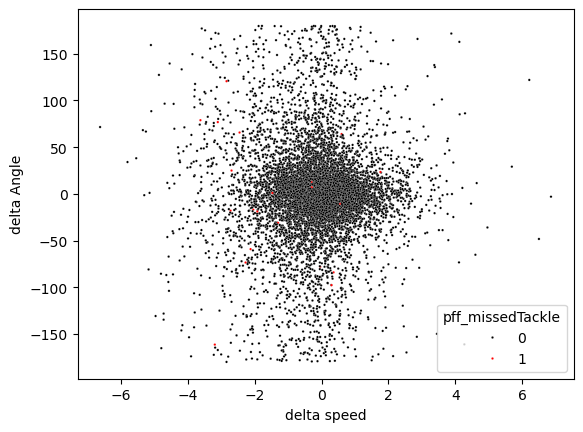

In [8]:
all_tracking_select = pd.concat(tracking_weeks).loc[:, ["gameId", "playId", "nflId", "s", "a", "o", "dir"]].dropna(how="any")
agg_select = agg.loc[agg["tackle"] == 1, ["gameId", "playId", "nflId", "ballCarrierId", "pff_missedTackle"]]
positions = agg_select.join(all_tracking_select.set_index(["gameId", "playId", "nflId"]), on = ["gameId", "playId", "nflId"], how = "inner")
positions = positions.join(all_tracking_select.set_index(["gameId", "playId", "nflId"]), on = ["gameId", "playId", "ballCarrierId"], rsuffix = "_carrier")
# use pff_missedTackle for whether or not the tackle was missed
sns.scatterplot(x=positions['s'] - positions['s_carrier'], y=(180 + positions['dir'] - positions['dir_carrier']) % 360 - 180, hue=positions['pff_missedTackle'], palette={"black", "red"}, s=3)
plt.ylabel("delta Angle")
plt.xlabel("delta speed")

From these, we can see that the ball carrier is generally going slightly faster than the defenders and the difference in their angle of travel is clustered around 0. There also seems to be little correlation with missed tackles.

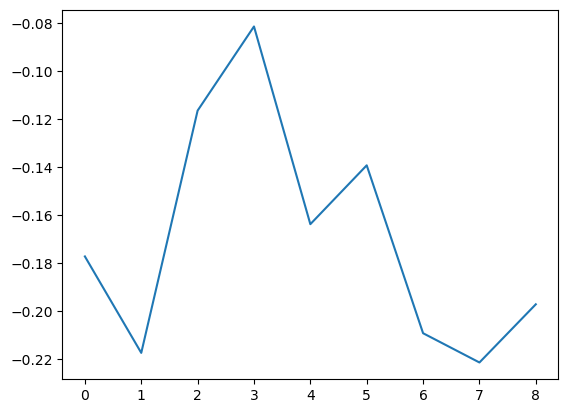

In [9]:
tracking_select = [tracking_week.loc[:, ["gameId", "playId", "nflId", "s", "a", "o", "dir"]].dropna(how="any") for tracking_week in tracking_weeks]
agg_select = agg.loc[agg["tackle"] == 1, ["gameId", "playId", "nflId", "ballCarrierId", "pff_missedTackle"]]
positions = [agg_select.join(df.set_index(["gameId", "playId", "nflId"]), on = ["gameId", "playId", "nflId"], how = "inner").join(df.set_index(["gameId", "playId", "nflId"]), on = ["gameId", "playId", "ballCarrierId"], rsuffix = "_carrier") for df in tracking_select]
a = [float((df["s"] - df["s_carrier"]).mean()) for df in positions]
plt.plot(a)